fake news classifier data taken from kaggle where we have ID TITLE AUTHOR TEXT and LABEL 
so here we will take only title and lable data and seprate it and store it into new data frame for  our modeling
this is a nlp problem so we have to perform few preprocessing steps before proceed like removing stopwords, 
converting into lower cases,removing special text,stemming 
after doing all these steps we are storing into new list (corpus) , 
then applying BAG OF WORDS taking top 5000 words with dimesion 3 
(1 word 2 word 3 word ),then after performing all these steps ,
we are creating navie bayes and paasive aggresive calssifer model and 
fitting into it and finding top score
90% and 91 %

In [ ]:
import pandas as pd #dataframe libraries
import numpy as np #calculation array librarries
import matplotlib.pyplot as plt #visulaization

In [2]:
traindata=pd.read_csv("train.csv") #loading dataframe train
traindata.head(7) #displaying content

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1


In [3]:
print(traindata.info()) #information of data
print(traindata.shape) #shape of data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None
(20800, 5)


In [4]:
traindata.describe(include="all") #describring data

,id,title,author,text,label
count,20800.000000,20242,18843,20761,20800.000000
unique,NaN,19803,4201,20386,NaN
top,NaN,The Dark Agenda Behind Globalism And Open Borders,Pam Key,,NaN
freq,NaN,5,243,75,NaN
mean,10399.500000,NaN,NaN,NaN,0.500625
std,6004.587135,NaN,NaN,NaN,0.500012
min,0.000000,NaN,NaN,NaN,0.000000
25%,5199.750000,NaN,NaN,NaN,0.000000
50%,10399.500000,NaN,NaN,NaN,1.000000
75%,15599.250000,NaN,NaN,NaN,1.000000


In [5]:
traindata.isnull().sum() #null values

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
traindata.dropna(inplace=True) #droping null values
print(traindata.shape) # after droping null values


(18285, 5)


In [7]:
traindata.reset_index(inplace=True) #reseting index after droping

In [8]:
traindata.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


# title-----------------------label

In [44]:
x=traindata[["title"]] #dividing data labeled or unlabeled # pay attention here 
y=traindata["label"]

In [45]:
from sklearn.feature_extraction.text import CountVectorizer #bag of words
import nltk # nlp libraries
from nltk.stem import PorterStemmer #steggimg lib
import re #lower cases
from nltk.corpus import stopwords # stop word lib that will removoe unwanted word like is am are  

In [46]:
ps = PorterStemmer() #object for stemming
corpus = [] # creating a corpus list that will store new sentence after lowering case with setmming and stopwords
for i in range(0,len(x)):
    review = re.sub('[^a-zA-Z]', ' ', x["title"][i]) # lowring case neglecting A----Z/a------z (title only)
    review = review.lower()
    review = review.split() #spliting each word
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [47]:
corpus # after applying stopwords , stemming  our sentences

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find home success new york time',
 'well fargo chief abruptli step new york time',
 'anonym donor pay million releas everyon arrest dakota access pipelin',
 'fbi close hilla

In [48]:
from sklearn.feature_extraction.text import CountVectorizer #bow
cv=CountVectorizer(max_features=5000,ngram_range=(1,3)) #dimemsions 5000 words with (1,3) 1 word 2 word 3 word
x=cv.fit_transform(corpus).toarray()

In [49]:
x.shape #shape after bow

(18285, 5000)

In [52]:
from sklearn.model_selection import train_test_split # sploiting data frame into train test 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.2) #20 %

In [53]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(14628, 5000)
(3657, 5000)
(14628,)
(3657,)


In [54]:
cv.get_feature_names() #extracted 5000 word with cobination of 3 words

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'abstain',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid',
 'accident',
 'accord',
 'account',
 'accus',
 'accus trump',
 'achiev',
 'acknowledg',
 'acknowledg emf',
 'acknowledg emf damag',
 'aclu',
 'acquit',
 'acquitt',
 'acr',
 'across',
 'act',
 'act like',
 'act new',
 'act new york',
 'action',
 'activ',
 'activist',
 'actor',
 'actual',
 'ad',
 'adam',
 'add',
 'addict',
 'address',
 'adhd',
 'admin',
 'administr',
 'admir',
 'admit',
 'adopt',
 'adult',
 'advanc',
 'advertis',
 'advic',
 'advis',
 'advis new',
 'advis new york',
 'advisor',
 'advoc',
 'affair',
 'affect',
 'affili',
 'affirm',
 'afford',
 'afghan',
 'afghanistan',
 'africa',
 'african',
 'african american',
 'ag',
 'age',
 'age new',
 'age new york',
 'agenc',
 'agenda',
 'agenda breitbart',
 'agent',
 'aggress',
 '

In [55]:
cv.get_params() #parameter used by BOW

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

# step 56 and 57 is not a part of model , only representing one hot encoding

In [56]:
count=pd.DataFrame(xtrain,columns=cv.get_feature_names()) #one hot representation of each or group of 3 words 

In [57]:
count.head(10)

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
This function prints and plots the confusion matrix.Normalization can be applied by setting `normalize=True`.

In [58]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# navie bayes algo 

[0 1 1 ... 1 1 0]
0.8977303800929723
Confusion matrix, without normalization


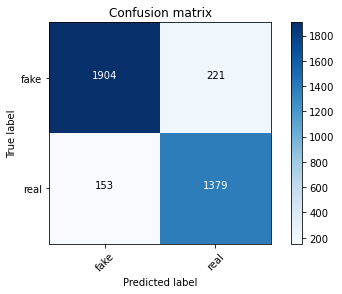

In [59]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(xtrain,ytrain)
pred=classifier.predict(xtest)
print(pred)
from sklearn import metrics
score=metrics.accuracy_score(ytest,pred)
print(score)
confusionmetrices=metrics.confusion_matrix(ytest,pred)
plot_confusion_matrix(confusionmetrices, classes=["fake","real"])

# passive aggresvie classifier algo

In [60]:
from sklearn.linear_model import PassiveAggressiveClassifier
model=PassiveAggressiveClassifier(n_jobs=50)
model.fit(xtrain,ytrain)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=50, random_state=None, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [61]:
pred=model.predict(xtest)
pred

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [62]:
score=metrics.accuracy_score(ytest,pred)
score

0.9207000273448182

Confusion matrix, without normalization


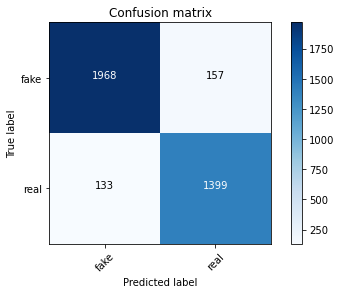

In [63]:
confusionmetrices=metrics.confusion_matrix(ytest,pred)
plot_confusion_matrix(confusionmetrices, classes=["fake","real"])